# Hidden Markov Model

## Imports and Initialisations

In [1]:
from collections import Counter
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import nltk

nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to /Users/sounak/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/sounak/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

## Importing Brown Corpus

In [2]:
from nltk.corpus import brown

In [3]:
sents = brown.tagged_sents(tagset='universal')
_N = int(len(sents) * (8 / 10))
sents_train = sents[:_N]
sents_test = sents[_N:]

In [4]:
tags = list(set([v for k, v in brown.tagged_words(tagset='universal')]).union({'START', 'END'}))
print(tags)

['VERB', 'NUM', 'CONJ', 'X', 'END', 'PRT', 'ADJ', 'DET', 'NOUN', 'ADP', '.', 'START', 'ADV', 'PRON']


## Getting N-grams

In [5]:
def get_ngrams(group, n):
    ngrams = []
    for i in range(n-1):
        group = [(' ', 'START')] + group + [(' ', 'END')]
        
    for i in range(len(group)-n+1):
        ngrams.append(tuple(group[i:i+n]))
    return ngrams

## Transition Model

In [6]:
def transition_model(groups, n):
    transition_model = Counter([])
    for group in groups:
        for ngrams in get_ngrams(group, n):
            seq = ()
            for word, tag in ngrams:
                seq += (tag, )
            transition_model.update([seq])
    return transition_model

transition_3 = transition_model(sents_train, 3)
print('transition_3 loaded')
transition_2 = transition_model(sents_train, 2)
print('transition_2 loaded')

transition_3 loaded
transition_2 loaded


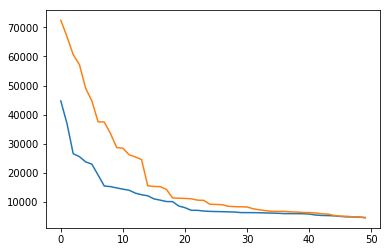

In [7]:
Y3_t = [b for a, b in transition_3.most_common(50)]
Y2_t = [b for a, b in transition_2.most_common(50)]

plt.plot(Y3_t)
plt.plot(Y2_t)
plt.show()

## Emission Model

In [8]:
def emission_model(groups):
    emission_model = Counter([])
    base_counts = Counter([])
    for group in groups:
        for ngram in get_ngrams(group, 2):
            seq = (ngram[0][0], ngram[1][1], ngram[1][0])
            emission_model.update([seq])
            base_counts.update([seq[:-1]])
    return emission_model, base_counts

emission_2, base_counts = emission_model(sents_train)
print('emission_2 loaded')

emission_2 loaded


In [9]:
emission_2.most_common(100), base_counts.most_common(100)

([(('.', 'END', ' '), 39534),
  (('of', 'DET', 'the'), 8808),
  ((' ', 'DET', 'The'), 5780),
  ((',', 'CONJ', 'and'), 5201),
  (('in', 'DET', 'the'), 4897),
  ((',', 'DET', 'the'), 3319),
  (('to', 'DET', 'the'), 3033),
  ((';', '.', ';'), 2442),
  ((';', 'END', ' '), 2442),
  (("''", '.', '.'), 2284),
  ((' ', '.', '``'), 2074),
  (('on', 'DET', 'the'), 1922),
  (('and', 'DET', 'the'), 1875),
  ((' ', 'PRON', 'He'), 1862),
  (('for', 'DET', 'the'), 1604),
  ((' ', 'PRON', 'It'), 1575),
  ((' ', 'ADP', 'In'), 1572),
  (('?', '.', '?'), 1565),
  (('?', 'END', ' '), 1565),
  (('to', 'VERB', 'be'), 1477),
  ((',', 'CONJ', 'but'), 1440),
  (("''", '.', ','), 1314),
  (('with', 'DET', 'the'), 1299),
  (('of', 'DET', 'a'), 1272),
  (('that', 'DET', 'the'), 1261),
  (('at', 'DET', 'the'), 1244),
  (('by', 'DET', 'the'), 1217),
  (('from', 'DET', 'the'), 1146),
  (('in', 'DET', 'a'), 1098),
  ((',', 'DET', 'a'), 1088),
  ((',', 'PRON', 'he'), 1036),
  ((' ', 'DET', 'This'), 1016),
  ((' ', 'CO

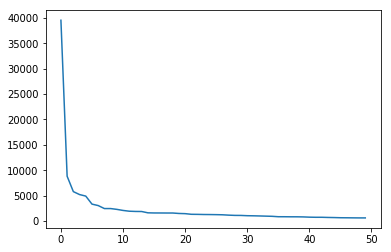

In [10]:
Y2_e = [b for a, b in emission_2.most_common(50)]
plt.plot(Y2_e)
plt.show()

## Initial Word Counts

In [11]:
init_counts = Counter([])
for sent in sents_train:
    init_counts.update([sent[0][1]])
    
print('init_counts loaded')

init_counts loaded


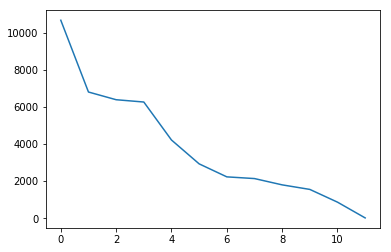

In [12]:
Y_init = [b for a, b in init_counts.most_common(50)]
plt.plot(Y_init)
plt.show()

## Calculating Probabilities

Calculating Transition and Emission Probabilities

In [13]:
transition_probs = Counter([])
for k, v in transition_3.items():
    try:
        transition_probs[k] = transition_3[k] / transition_2[k[:-1]]
    except ZeroDivisionError:
        pass

print('transition_probs loaded')

transition_probs loaded


In [14]:
transition_probs

Counter({('START', 'DET', 'NOUN'): 0.5978434130332865,
         ('DET', 'NOUN', 'NOUN'): 0.140014361863728,
         ('NOUN', 'NOUN', 'ADJ'): 0.010945592396817768,
         ('NOUN', 'ADJ', 'NOUN'): 0.47686053783614757,
         ('ADJ', 'NOUN', 'VERB'): 0.1411887000122294,
         ('NOUN', 'VERB', 'NOUN'): 0.05254047720494248,
         ('VERB', 'NOUN', 'DET'): 0.01763519229517798,
         ('NOUN', 'DET', 'NOUN'): 0.42570817744521644,
         ('DET', 'NOUN', 'ADP'): 0.32862429916866903,
         ('NOUN', 'ADP', 'NOUN'): 0.3183198046591434,
         ('ADP', 'NOUN', 'ADJ'): 0.015027729739400083,
         ('ADJ', 'NOUN', 'NOUN'): 0.09981248216542334,
         ('NOUN', 'NOUN', 'VERB'): 0.17998825351059855,
         ('NOUN', 'VERB', '.'): 0.056747976139752875,
         ('VERB', '.', 'DET'): 0.062110695853354686,
         ('.', 'DET', 'NOUN'): 0.5485078993563487,
         ('DET', 'NOUN', '.'): 0.20508465213908914,
         ('NOUN', '.', 'ADP'): 0.06686834498974137,
         ('.', 'ADP', 'DE

In [15]:
emission_probs = Counter([])
for k, v in emission_2.items():
    try:
        emission_probs[k] = emission_2[k] / base_counts[k[:-1]]
    except ZeroDivisionError:
        pass

print('emission_probs loaded')

emission_probs loaded


In [16]:
emission_probs

Counter({(' ', 'DET', 'The'): 0.5419596812001876,
         ('The', 'NOUN', 'Fulton'): 0.0002295684113865932,
         ('Fulton', 'NOUN', 'County'): 0.5,
         ('County', 'ADJ', 'Grand'): 0.2,
         ('Grand', 'NOUN', 'Jury'): 0.15384615384615385,
         ('Jury', 'VERB', 'said'): 1.0,
         ('said', 'NOUN', 'Friday'): 0.037383177570093455,
         ('Friday', 'DET', 'an'): 0.5,
         ('an', 'NOUN', 'investigation'): 0.003861003861003861,
         ('investigation', 'ADP', 'of'): 0.7368421052631579,
         ('of', 'NOUN', "Atlanta's"): 8.5295121119072e-05,
         ("Atlanta's", 'ADJ', 'recent'): 0.5,
         ('recent', 'NOUN', 'primary'): 0.007042253521126761,
         ('primary', 'NOUN', 'election'): 0.028985507246376812,
         ('election', 'VERB', 'produced'): 0.07692307692307693,
         ('produced', '.', '``'): 0.125,
         ('``', 'DET', 'no'): 0.0038412291933418692,
         ('no', 'NOUN', 'evidence'): 0.015184381778741865,
         ('evidence', '.', "''"): 0.0

In [17]:
init_probs = Counter([])
for k, v in init_counts.items():
    init_probs[k] = v / _N
    
print('init_probs loaded')

init_probs loaded


In [18]:
init_probs

Counter({'DET': 0.23249476805022673,
         '.': 0.06389518660620858,
         'PRON': 0.1391916637600279,
         'NOUN': 0.14823857690966166,
         'ADV': 0.09190791768399023,
         'ADP': 0.1364884897104988,
         'VERB': 0.0466297523543774,
         'NUM': 0.01894401813742588,
         'CONJ': 0.04863533310080223,
         'ADJ': 0.039239623299616326,
         'PRT': 0.0338986745727241,
         'X': 0.00043599581444018137})

## Smoothed Probabilites

In [30]:
k = 0.01

init_N = sum(init_counts.values())
init_V = len(init_counts.values())
def get_init_probs(key):
    return (init_counts[key] + k) / (init_N + k * init_V)

emm_V = len(emission_2.values())
def get_emission_probs(key):
        return (emission_2[key] + k) / (base_counts[key[:-1]] + k * emm_V)

tran_V = len(transition_3.values())
def get_transition_probs(key):
        return (transition_3[key] + k) / (transition_2[key[:-1]] + k * tran_V)

## Viterbi Algorithm

In [31]:
def viterbi(seq_w):
    T = len(tags)
    N = len(seq_w)
    seq = np.ones((N, )) * -1
    trellis = np.zeros((N, T))    
    for t in range(len(tags)):
        trellis[0, t] = get_init_probs(tags[t]) * get_emission_probs((' ', tags[t], seq_w[0]))
        
    for i in range(1, N):
        for t in range(len(tags)):
            for t_ in range(len(tags)):
                for t__ in range(len(tags)):
                    trans = get_transition_probs((tags[t__], tags[t_], tags[t]))
                    emiss = get_emission_probs((seq_w[i-1], tags[t], seq_w[i]))
                    temp = trellis[i-1, t_] * trans * emiss
                    if temp > trellis[i, t]:
                        trellis[i, t] = temp
                        seq[i-1] = t_

    max_vit = 0
    for i in range(T):
        if trellis[N-1, i] > max_vit:
            max_vit = trellis[N-1, i]
            seq[N-1] = i

    seq_tags = [(seq_w[_], tags[int(seq[_])]) for _ in range(N)]
    return seq_tags

In [32]:
# score = 0
# total_count = 0
# for sent in sents_test:
#     res = viterbi([word for word, tag in sent])
#     N = len(sent)
#     total_count += N
#     for i in range(N):
#         score += 1 if res[i][1] == sent[i][1] else 0

# accuracy = (score / total_count) * 100
# print(accuracy)k

In [35]:
viterbi([word for word, tag in sents_test[1]])

[('Oh', 'PRT'),
 (',', '.'),
 ('yes', 'ADV'),
 (',', '.'),
 ("I'm", 'PRT'),
 ('quite', 'START'),
 ('sure', 'START'),
 ("it's", 'PRT'),
 ('important', 'START'),
 (',', '.'),
 ('because', 'ADP'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('Beech', 'START'),
 ('Pasture', 'START'),
 ('.', 'NOUN')]